<a href="https://colab.research.google.com/github/Minh-A/Data_Analysis/blob/main/Pytorch_Deep%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 딥러닝으로 클러스터링을 진행...
* 어떻게?를 고민해보자

In [1]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import random

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = glob.glob('/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/*.csv')
len(train)

7

In [4]:
train

['/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis2.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis3.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis4.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis5.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis6.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis10.csv']

In [483]:
temp = pd.read_csv(train[6], encoding='cp949', index_col= 'Unnamed: 0')
temp

,코드,코드명,현재가,거래량,거래대금,날짜,시가,고가,저가
0,900070,글로벌에스엠,558,153628,86,20201230,560,564,555
1,900070,글로벌에스엠,557,107146,60,20201229,555,566,555
2,900070,글로벌에스엠,566,152044,86,20201228,570,579,563
3,900070,글로벌에스엠,570,377914,213,20201224,568,570,549
4,900070,글로벌에스엠,569,181692,103,20201223,574,577,559
...,...,...,...,...,...,...,...,...,...
107075,000020,동화약품,18100,912306,17046,20201110,19950,20000,18000
107076,000020,동화약품,18950,321139,6050,20201109,18550,19100,18300
107077,000020,동화약품,18300,379887,7000,20201106,19000,19250,18000
107078,000020,동화약품,18750,273054,5095,20201105,18300,18900,18250


In [484]:
temp1 = pd.DataFrame()

temp1.loc[:,'전체등락률'] = (temp.iloc[:,2] / temp.iloc[:,6]) - 1
temp1.loc[:,'종가 정규화'] = (temp.iloc[:,2] - temp.iloc[:,6]) / temp.iloc[:,2]
temp1.loc[:,'봉길이 정규화'] = (temp.iloc[:,7] - temp.iloc[:,8]) / temp.iloc[:,2]
temp1.loc[:,'고가 등락률'] = (temp.iloc[:,7] - temp.iloc[:,2]) / temp.iloc[:,8]
temp1.loc[:,'거래대금 지표'] = temp.iloc[:,4] / temp.iloc[:,7]
temp1.loc[:,'거래량 정규화'] = ((temp.iloc[:,3] / temp.iloc[:,8]) / (temp.iloc[:,3] / temp.iloc[:,7])) - 1

In [485]:
temp1

,전체등락률,종가 정규화,봉길이 정규화,고가 등락률,거래대금 지표,거래량 정규화
0,-0.003571,-0.003584,0.016129,0.010811,0.152482,0.016216
1,0.003604,0.003591,0.019749,0.016216,0.106007,0.019820
2,-0.007018,-0.007067,0.028269,0.023091,0.148532,0.028419
3,0.003521,0.003509,0.036842,0.000000,0.373684,0.038251
4,-0.008711,-0.008787,0.031634,0.014311,0.178510,0.032200
...,...,...,...,...,...,...
107075,-0.092732,-0.102210,0.110497,0.105556,0.852300,0.111111
107076,0.021563,0.021108,0.042216,0.008197,0.316754,0.043716
107077,-0.036842,-0.038251,0.068306,0.052778,0.363636,0.069444
107078,0.024590,0.024000,0.034667,0.008219,0.269577,0.035616


In [486]:
# 없는 것들을 찾았너!!!
print(temp1.loc[temp1.isna().iloc[:,5] == True,:])
temp1.loc[temp1.isna().iloc[:,5] == True,:] = 0

        전체등락률  종가 정규화  봉길이 정규화  고가 등락률  거래대금 지표  거래량 정규화
485       0.0     0.0      0.0     0.0      0.0      NaN
506       0.0     0.0      0.0     0.0      0.0      NaN
509       0.0     0.0      0.0     0.0      0.0      NaN
516       0.0     0.0      0.0     0.0      0.0      NaN
518       0.0     0.0      0.0     0.0      0.0      NaN
...       ...     ...      ...     ...      ...      ...
100233    0.0     0.0      0.0     0.0      0.0      NaN
100292    0.0     0.0      0.0     0.0      0.0      NaN
100293    0.0     0.0      0.0     0.0      0.0      NaN
100294    0.0     0.0      0.0     0.0      0.0      NaN
100526    0.0     0.0      0.0     0.0      0.0      NaN

[652 rows x 6 columns]


In [487]:
temp1.iloc[485,:]

전체등락률      0.0
종가 정규화     0.0
봉길이 정규화    0.0
고가 등락률     0.0
거래대금 지표    0.0
거래량 정규화    0.0
Name: 485, dtype: float64

In [488]:
temp1.loc[:,'고가 등락률'].describe()

count    107080.000000
mean          0.019960
std           0.026549
min           0.000000
25%           0.004545
50%           0.012552
75%           0.025478
max           0.855556
Name: 고가 등락률, dtype: float64

In [489]:
# 파이토치 라이브러리 임포트
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# sklearn 라이브러리 임포트
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# pandas 라이브러리 임포트
import pandas as pd

In [490]:
temp_np = np.array(temp1)
temp_np

array([[-0.00357143, -0.00358423,  0.01612903,  0.01081081,  0.15248227,
         0.01621622],
       [ 0.0036036 ,  0.00359066,  0.01974865,  0.01621622,  0.10600707,
         0.01981982],
       [-0.00701754, -0.00706714,  0.02826855,  0.02309059,  0.14853195,
         0.02841918],
       ...,
       [-0.03684211, -0.03825137,  0.06830601,  0.05277778,  0.36363636,
         0.06944444],
       [ 0.02459016,  0.024     ,  0.03466667,  0.00821918,  0.26957672,
         0.03561644],
       [-0.02666667, -0.02739726,  0.04383562,  0.02785515,  0.27802667,
         0.04456825]])

In [491]:
temp_np = torch.from_numpy(temp_np).float().cuda()
temp_np

tensor([[-0.0036, -0.0036,  0.0161,  0.0108,  0.1525,  0.0162],
        [ 0.0036,  0.0036,  0.0197,  0.0162,  0.1060,  0.0198],
        [-0.0070, -0.0071,  0.0283,  0.0231,  0.1485,  0.0284],
        ...,
        [-0.0368, -0.0383,  0.0683,  0.0528,  0.3636,  0.0694],
        [ 0.0246,  0.0240,  0.0347,  0.0082,  0.2696,  0.0356],
        [-0.0267, -0.0274,  0.0438,  0.0279,  0.2780,  0.0446]],
       device='cuda:0')

In [476]:
temp_np.shape

torch.Size([107080, 6])

In [477]:
temp_np[1]

tensor([0.0036, 0.0036, 0.0197, 0.0162, 0.1060, 0.0198], device='cuda:0')

In [492]:
# 어음... 그냥 보자
train_x, test_x = train_test_split(temp_np, train_size = 80000)

print(len(train_x))
print(len(test_x))

80000
27080


> nn 패키지를 사용하여 모델을 순차적 계층(sequence of layers)으로 정의합니다.

> nn.Sequential은 다른 Module들을 포함하는 Module로, 그 Module들을 순차적으로

> 적용하여 출력을 생성합니다. 각각의 Linear Module은 선형 함수를 사용하여

> 입력으로부터 출력을 계산하고, 내부 Tensor에 가중치와 편향을 저장합니다.
* model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [462]:
# 신경망 구성
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(6,128)
    self.fc2 = nn.Linear(128,6)
    self.fc3 = nn.Linear(6,256)
    self.fc4 = nn.Linear(256,6)
    self.fc5 = nn.Linear(6,512)
    self.fc6 = nn.Linear(512,16)
    self.fc7 = nn.Linear(16,3)

  def forward(self,x):
    x = F.elu(self.fc1(x))
    x = F.elu(self.fc2(x))
    x = F.elu(self.fc1(x))
    x = F.elu(self.fc2(x))

    x = F.elu(self.fc3(x))
    x = F.elu(self.fc4(x))
    x = F.elu(self.fc3(x))
    x = F.elu(self.fc4(x))

    x = F.elu(self.fc5(x))
    x = F.elu(self.fc6(x))
    x = F.elu(self.fc7(x))
    return F.softmax(x)

# 인스턴스 생성
model = Net()
model.cuda()

Net(
  (fc1): Linear(in_features=6, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=6, bias=True)
  (fc3): Linear(in_features=6, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=6, bias=True)
  (fc5): Linear(in_features=6, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=16, bias=True)
  (fc7): Linear(in_features=16, out_features=3, bias=True)
)

In [493]:
# 신경망 구성
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(6,128)
    self.fc2 = nn.Linear(128,6)
    self.fc3 = nn.Linear(6,256)
    self.fc4 = nn.Linear(256,6)
    self.fc5 = nn.Linear(6,512)
    self.fc6 = nn.Linear(512,16)
    self.fc7 = nn.Linear(16,3)

  def forward(self,x):
    x = (self.fc1(x))
    x = (self.fc2(x))
    x = (self.fc1(x))
    x = (self.fc2(x))

    x = (self.fc3(x))
    x = (self.fc4(x))
    x = (self.fc3(x))
    x = (self.fc4(x))

    x = (self.fc5(x))
    x = (self.fc6(x))
    x = (self.fc7(x))
    return F.softmax(x)

# 인스턴스 생성
model = Net()
model.cuda()

Net(
  (fc1): Linear(in_features=6, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=6, bias=True)
  (fc3): Linear(in_features=6, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=6, bias=True)
  (fc5): Linear(in_features=6, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=16, bias=True)
  (fc7): Linear(in_features=16, out_features=3, bias=True)
)

모험, 데이터가 NAN이면 Loss값이 계산이 안된다

In [322]:
# 미니배치로 분할
train_loader = DataLoader(temp_np, batch_size=10708, shuffle=True)
for i in train_loader:
  print(i)

tensor([[ 6.4846e-03,  6.4429e-03,  1.1190e-02,  1.7117e-03,  1.4929e-01,
          1.1298e-02],
        [ 8.7371e-03,  8.6614e-03,  2.2835e-02,  5.6090e-03,  4.3203e-02,
          2.3237e-02],
        [-3.4856e-02, -3.6115e-02,  5.3549e-02,  3.6755e-02,  3.9377e-01,
          5.4499e-02],
        ...,
        [ 1.2613e-02,  1.2456e-02,  7.4733e-02,  3.8817e-02,  2.3465e+00,
          7.7634e-02],
        [-2.9772e-02, -3.0686e-02,  4.3321e-02,  4.1591e-02,  2.3076e-01,
          4.3400e-02],
        [-6.7039e-03, -6.7492e-03,  7.8740e-03,  6.7568e-03,  2.1229e-03,
          7.8829e-03]])
tensor([[ 1.4353e-02,  1.4150e-02,  1.4344e-02,  0.0000e+00,  1.1630e-04,
          1.4553e-02],
        [ 2.0277e-02,  1.9874e-02,  3.9749e-02,  8.6393e-03,  1.6224e-01,
          4.1037e-02],
        [ 4.5213e-03,  4.5010e-03,  4.5010e-03,  0.0000e+00,  1.1742e-04,
          4.5213e-03],
        ...,
        [-1.3477e-03, -1.3495e-03,  1.7544e-02,  6.8213e-03,  2.4236e-02,
          1.7735e-02],
   

In [323]:
# 그냥 초기값을 생성
output_p = np.zeros(10708)
output_p = torch.from_numpy(output_p).long()
output_p.shape

torch.Size([10708])

In [324]:
i[1]

tensor([0.0019, 0.0019, 0.0251, 0.0020, 0.4303, 0.0257])

In [325]:
i[6]

tensor([-0.0056, -0.0056,  0.0056,  0.0056,  0.0275,  0.0056])

In [326]:
output = model(i)
output.shape

torch.Size([10708, 3])

In [327]:
output

tensor([[0.3599, 0.3031, 0.3371],
        [0.3593, 0.3028, 0.3379],
        [0.3601, 0.3032, 0.3367],
        ...,
        [0.3603, 0.3033, 0.3363],
        [0.3602, 0.3033, 0.3365],
        [0.3601, 0.3032, 0.3367]], grad_fn=<SoftmaxBackward>)

In [328]:
torch.max(output.data, 1)[1]

tensor([0, 0, 0,  ..., 0, 0, 0])

In [329]:
output_p

tensor([0, 0, 0,  ..., 0, 0, 0])

In [330]:
criterion = nn.CrossEntropyLoss()
criterion(output, output_p)

tensor(1.0727, grad_fn=<NllLossBackward>)

************************

In [494]:
# 미니배치로 분할
# 데이터의 무결성이 필요!!!
train_loader = DataLoader(train_x, batch_size=800, shuffle=True)

In [495]:
# 모형의 시작이여
output_p = np.zeros(800)
output_p = torch.from_numpy(output_p).long().cuda()
output_p.shape

torch.Size([800])

In [496]:
# 모형 학습

# 오차함수 객체
criterion = nn.CrossEntropyLoss()

# 최적화 담당
optimizer = optim.SGD(model.parameters(), lr = 1e-2)  #경사하강법은 SGD

# 학습시작
for epoch in range(1000):
  total_loss = 0

  for train_x in train_loader:
    train_x = Variable(train_x)  # 미분을 가능하게 : ".backward()"에 사용하는 변수인데 사용안해도 되던데.... 아리송송

    optimizer.zero_grad()  # 경사초기화

    output = model(train_x)  # 순전파 계산

    loss = criterion(output, output_p)  # 오차 계산
    loss.backward()  # 역전파 계산

    optimizer.step()  #가중치 업데이트

    output_p = torch.max(output.data, 1)[1]  # 이전 예측분류가 Y값이 되는 것

    total_loss += loss.data  # 누적오차 계산
  
  if (epoch+1) % 50 == 0:
    print(epoch+1, float(total_loss))

50 55.1464729309082
100 55.145286560058594
150 55.14496994018555
200 55.144874572753906
250 55.144798278808594
300 55.14461135864258
350 55.14460754394531
400 55.14460372924805
450 55.14458465576172
500 55.144527435302734
550 55.144527435302734
600 55.14452362060547
650 55.14452362060547
700 55.14451217651367
750 55.144508361816406
800 55.144508361816406
850 55.144508361816406
900 55.14450454711914
950 55.14450454711914
1000 55.14450454711914


In [ ]:
test_x, test_y = Variable(test_x), Variable(test_y)   # 이거 안해도 문제 없움

# 출력이 0또는 1이 되도록
result = torch.max(model(test_x).data, 1)[1]

# 측정
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())
accuracy

# 임마는 그냥 최닷값을 뽑아서 1을 넣어주는데 아리송송해

In [497]:
model(test_x)

tensor([[6.7926e-07, 1.0000e+00, 3.0235e-07],
        [5.1263e-07, 1.0000e+00, 2.2633e-07],
        [5.3590e-07, 1.0000e+00, 2.3694e-07],
        ...,
        [6.6132e-07, 1.0000e+00, 2.9413e-07],
        [6.7075e-07, 1.0000e+00, 2.9845e-07],
        [6.5812e-07, 1.0000e+00, 2.9268e-07]], device='cuda:0',
       grad_fn=<SoftmaxBackward>)

In [498]:
result = torch.max(model(test_x).data, 1)[1]
result

tensor([1, 1, 1,  ..., 1, 1, 1], device='cuda:0')

In [499]:
pd.DataFrame(result.cpu().numpy()).value_counts()

1    27080
dtype: int64

In [ ]:
a = temp.iloc[0:40,:]  # :은 작다를 의미, 작거나 같다를 의미하는 것은 아님
a.tail()

,코드,코드명,현재가,거래량,거래대금,날짜,시가,고가,저가
35,900070,글로벌에스엠,556,188053,104,20201110,557,565,551
36,900070,글로벌에스엠,556,215930,120,20201109,549,575,548
37,900070,글로벌에스엠,552,245739,136,20201106,579,579,546
38,900070,글로벌에스엠,560,1133165,625,20201105,521,573,516
39,900070,글로벌에스엠,521,99560,52,20201104,531,531,516


In [ ]:
int(len(temp)/40)

2677

In [ ]:
160 /40

4.0

In [ ]:
for i in range(4):
  if i == 0:
    f = i
  else:
    f = i + (39*i)
  j = f + 40
  print(f,j)

0 40
40 80
80 120
120 160


In [ ]:
0 40
41 81
82 122

In [ ]:
# 변수 지정
for i in range(int(len(temp)/40)):
  if i == 0:
    f = i
  else:
    f = i + (39*i)
  n = f + 40
  globals()['t_{}'.format(i+1)] = temp.iloc[f:n,:].reset_index(drop = True)
print(f,n)

107040 107080


In [ ]:
39200 /40

980.0

In [ ]:
t_980.tail()

,코드,코드명,현재가,거래량,거래대금,날짜,시가,고가,저가
35,044060,조광ILI,8700,430757,3819,20201110,9300,9300,8590
36,044060,조광ILI,9300,746408,6770,20201109,8500,9320,8460
37,044060,조광ILI,8430,127476,1071,20201106,8430,8540,8240
38,044060,조광ILI,8360,217510,1831,20201105,8110,8650,8110
39,044060,조광ILI,8100,134668,1105,20201104,8240,8380,8050


In [ ]:
a = t_1.loc[:,['현재가','거래량','시가']]
a = a.to_numpy()

In [ ]:
a[:,0]

array([558, 557, 566, 570, 569, 577, 577, 559, 557, 552, 546, 551, 552,
       547, 535, 530, 532, 539, 536, 534, 538, 537, 540, 539, 541, 541,
       538, 534, 530, 556, 557, 561, 562, 558, 556, 556, 556, 552, 560,
       521])

> 첫 번째는 40일간의 데이터를 가지고, 종목을 뽑아보기

> 거래량과 시가, 고가, 저가

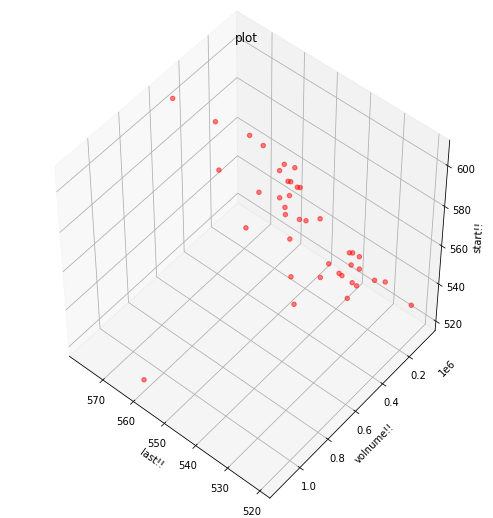

In [ ]:
#군집 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=130)
ax.scatter(a[:,0], a[:,1], a[:,2], c= 'r', alpha=0.5, cmap='rainbow')
ax.set_title('plot')
ax.set_xlabel('last!!')
ax.set_ylabel('volnume!!')
ax.set_zlabel('start!!')
plt.show()

In [ ]:
# K-Means 모델
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 3
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(a)
predict = pd.DataFrame(model.predict(a))
predict.columns=['predict']

In [ ]:
# vstack은 행으로 붙이기, hstack는 열로 붙이기
final_df = pd.DataFrame(np.hstack((predict, a)))

In [ ]:
final_df.head()

,0,1,2,3
0,0,558,153628,560
1,0,557,107146,555
2,0,566,152044,570
3,2,570,377914,568
4,0,569,181692,574


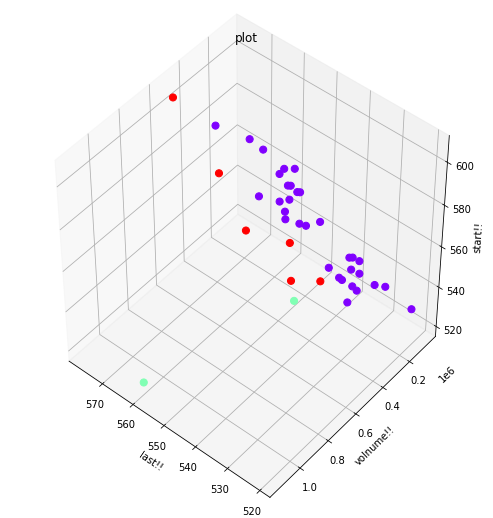

In [ ]:
#군집 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=130)
ax.scatter(final_df[1], final_df[2], final_df[3], c= final_df[0], alpha=1, s = 50,cmap='rainbow')
ax.set_title('plot')
ax.set_xlabel('last!!')
ax.set_ylabel('volnume!!')
ax.set_zlabel('start!!')
plt.show()

In [ ]:
# K-Means 함수

def kmeans(data): 
  # 라이브러리
  from sklearn.cluster import KMeans
  import matplotlib.pyplot  as plt
  from mpl_toolkits.mplot3d import Axes3D

  data =data.loc[:,['현재가','거래량','시가']]
  data = data.to_numpy()

  k = 20
  model = KMeans(n_clusters=k,algorithm='auto')
  model.fit(data)
  predict = pd.DataFrame(model.predict(data))
  predict.columns=['predict']

  global name
  name = pd.DataFrame(np.hstack((predict, data)))

  fig = plt.figure(figsize=(8, 8))
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=130)
  ax.scatter(name[1], name[2], name[3], c= name[0], alpha=1, s=50, cmap='rainbow') 
  ax.set_title('plot')
  ax.set_xlabel('last!!')
  ax.set_ylabel('volnume!!')
  ax.set_zlabel('start!!')
  plt.show()

In [ ]:
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

NameError: ignored

In [ ]:
final_df[0] == '0'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
Name: 0, dtype: bool

In [ ]:
final_df.loc[final_df[0] == 1,2]

28     753514
38    1133165
Name: 2, dtype: int64

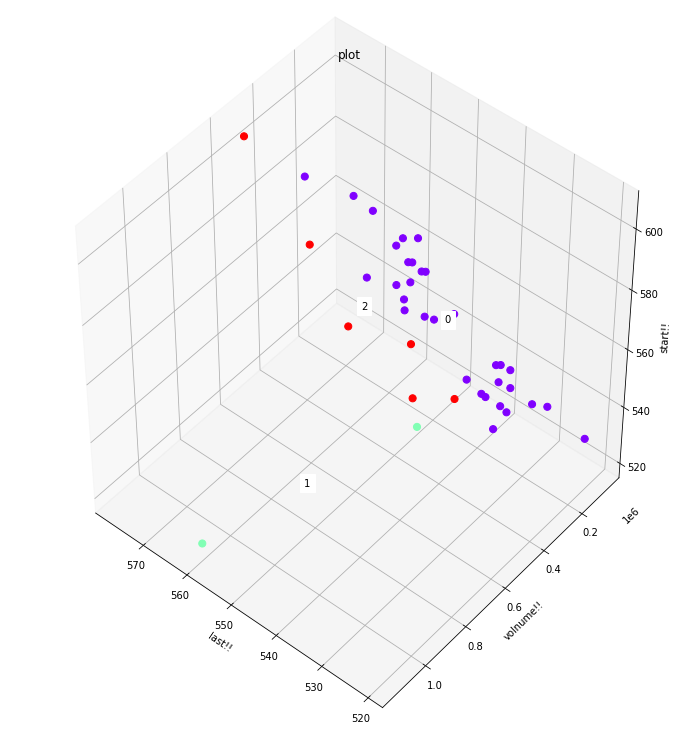

In [ ]:
#군집 시각화 (3차원)
#점에 대한 값을 표시

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=130)

for name, label in [('0', 0),
                    ('1', 1),
                    ('2', 2)]:
    ax.text3D(final_df.loc[final_df[0] == label, 1].mean(),
              final_df.loc[final_df[0] == label, 2].mean(),
              final_df.loc[final_df[0] == label, 3].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=1, edgecolor='w', facecolor='w'))

ax.scatter(final_df[1], final_df[2], final_df[3], c= final_df[0], alpha=1, s = 50,cmap='rainbow')
ax.set_title('plot')
ax.set_xlabel('last!!')
ax.set_ylabel('volnume!!')
ax.set_zlabel('start!!')
plt.show()

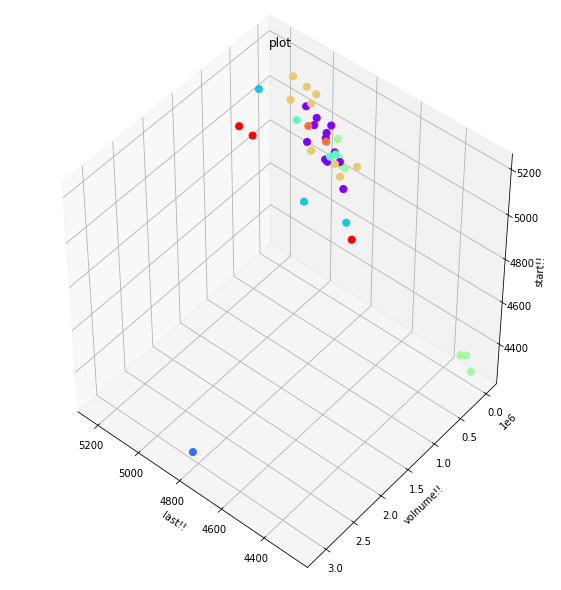

In [ ]:
kmeans(t_5)

In [ ]:
pd.DataFrame(np.array(y))

NameError: ignored

전체를 정규화를 해서 모델링과 그래프화

In [ ]:
# 변수 지정
data = pd.DataFrame()


In [ ]:
data

""


In [ ]:
# 변수 지정
data = pd.DataFrame()

for i in range(int(len(temp)/40)):
  if i == 0:
    f = i
  else:
    f = i + (39*i)
  n = f + 40
  data1 = temp.iloc[f:n,:]
  data1 = data1.loc[:,['현재가','거래량','시가']]

  # 정규화
  from sklearn.preprocessing import MinMaxScaler
  transformer = MinMaxScaler()
  transformer.fit(data1)
  data1 = transformer.transform(data1)
  data1 = pd.DataFrame(data1, columns = ['현재가', '거래량', '시가'])

  data = pd.concat([data, data1], axis = 0).reset_index(drop = True)


In [ ]:
data

,현재가,거래량,시가
0,0.660714,0.071004,0.458824
1,0.642857,0.026920,0.400000
2,0.803571,0.069502,0.576471
3,0.875000,0.283718,0.552941
4,0.857143,0.097620,0.623529
...,...,...,...
107075,0.064516,0.035837,0.379845
107076,0.201613,0.002696,0.162791
107077,0.096774,0.005989,0.232558
107078,0.169355,0.000000,0.124031


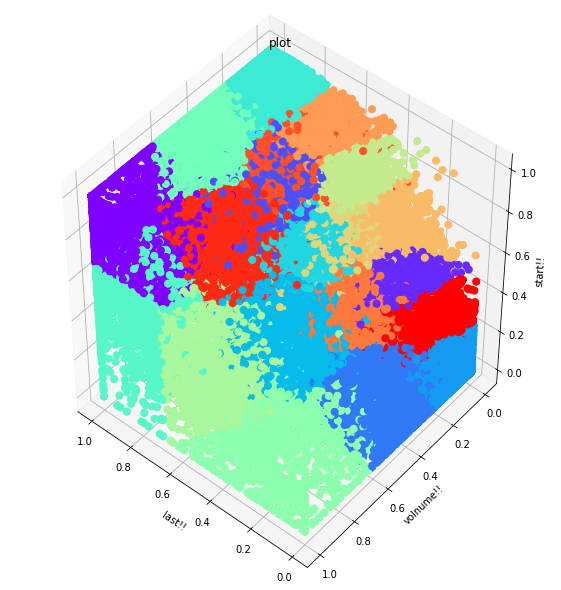

In [ ]:
kmeans(data)

In [ ]:
name.loc[name[0] == 1, 1]

5         1.000000
6         1.000000
64        0.724138
65        1.000000
66        0.919540
            ...   
106988    0.741935
107016    0.804772
107020    0.739696
107021    0.891540
107045    1.000000
Name: 1, Length: 14022, dtype: float64

In [ ]:
name = pd.DataFrame(name)
name

,0,1,2,3
0,2.0,0.660714,0.071004,0.458824
1,2.0,0.642857,0.026920,0.400000
2,7.0,0.803571,0.069502,0.576471
3,5.0,0.875000,0.283718,0.552941
4,7.0,0.857143,0.097620,0.623529
...,...,...,...,...
107075,6.0,0.064516,0.035837,0.379845
107076,0.0,0.201613,0.002696,0.162791
107077,0.0,0.096774,0.005989,0.232558
107078,0.0,0.169355,0.000000,0.124031


posx and posy should be finite values
posx and posy should be finite values


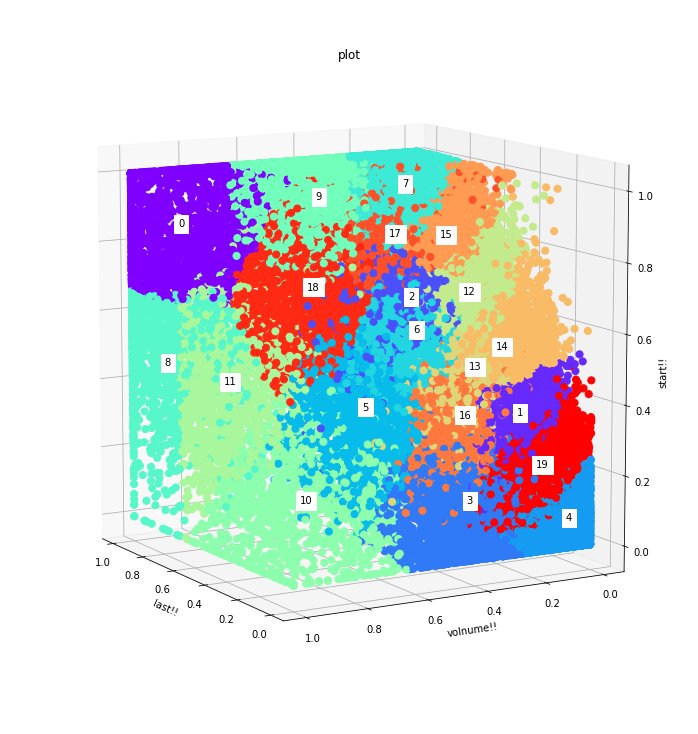

In [ ]:
#군집 시각화 (3차원)
#점에 대한 값을 표시

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=150)

for nam, label in [('0', 0),
                    ('1', 1),
                    ('2', 2),
                    ('3', 3),
                    ('4', 4),
                    ('5', 5),
                    ('6', 6),
                    ('7', 7),
                    ('8', 8),
                    ('9', 9),
                    ('10', 10),
                    ('11', 11),
                    ('12', 12),
                    ('13', 13),
                    ('14', 14),
                    ('15', 15),
                    ('16', 16),
                    ('17', 17),
                    ('18', 18),
                    ('19', 19),
                    ('20', 20)]:
    ax.text3D(name.loc[name[0] == label, 1].mean(),
              name.loc[name[0] == label, 2].mean(),
              name.loc[name[0] == label, 3].mean(), nam,
              horizontalalignment='center',
              bbox=dict(alpha=1, edgecolor='w', facecolor='w'))

ax.scatter(name[1], name[2], name[3], c= name[0], alpha=1, s = 50,cmap='rainbow')
ax.set_title('plot')
ax.set_xlabel('last!!')
ax.set_ylabel('volnume!!')
ax.set_zlabel('start!!')
plt.show()

K를 8개로 하여, 3번이 최고의 점이구나!!!

In [ ]:
# 뽑아내기
name.loc[name.loc[:,0] == 8,:]

,0,1,2,3
38,8.0,0.696429,1.000000,0.000000
72,8.0,0.735632,1.000000,0.288660
100,8.0,1.000000,1.000000,0.567797
153,8.0,0.788889,1.000000,0.304878
345,8.0,1.000000,1.000000,0.497630
...,...,...,...,...
106726,8.0,1.000000,1.000000,0.636392
106846,8.0,1.000000,1.000000,0.406250
106886,8.0,1.000000,1.000000,0.548872
106930,8.0,0.914894,0.809158,0.541667


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5518b79fd0>,
                 k=None, metric=None, model=None, timings=True)

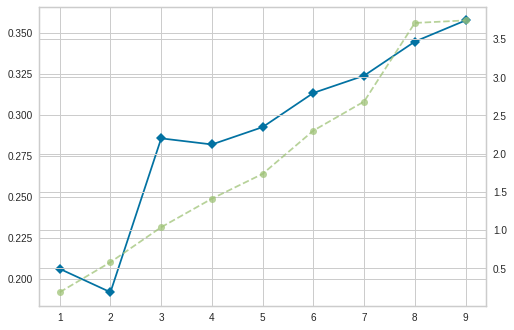

In [ ]:
# 파란선은 그룹의 변동성을 녹선은 군집학습의 걸린 시간을
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data)

In [ ]:
name

,0,1,2,3
0,7.0,0.660714,0.071004,0.458824
1,7.0,0.642857,0.026920,0.400000
2,2.0,0.803571,0.069502,0.576471
3,5.0,0.875000,0.283718,0.552941
4,2.0,0.857143,0.097620,0.623529
...,...,...,...,...
107075,0.0,0.064516,0.035837,0.379845
107076,4.0,0.201613,0.002696,0.162791
107077,4.0,0.096774,0.005989,0.232558
107078,4.0,0.169355,0.000000,0.124031


In [ ]:
name[0].value_counts()

4.0    20671
0.0    20509
7.0    19310
2.0    17738
6.0    13880
5.0     6885
1.0     4249
3.0     3838
Name: 0, dtype: int64

> 최적의 K-Means 개수 찾기

> 데이터 분리하기

> SVM 모델을 적용, 그래프화 하기

> 딥러닝 파이토치로 적용

In [ ]:
x = name.iloc[:,1:]
y = name.iloc[:,0]

In [ ]:
y

0         7.0
1         7.0
2         2.0
3         5.0
4         2.0
         ... 
107075    0.0
107076    4.0
107077    4.0
107078    4.0
107079    4.0
Name: 0, Length: 107080, dtype: float64

In [ ]:
# 전체 데이터train, test 데이터 구분 (함수화 - split로 이름지음)
from sklearn import model_selection as ms

def split(X_data, Y_data):
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = ms.train_test_split(X_data, Y_data, 
                                                           test_size = 0.2, random_state = 100, stratify = y)
    return

In [ ]:
split(x,y)

In [ ]:
y_test

65706     7.0
19080     7.0
40510     0.0
43049     7.0
77253     2.0
         ... 
60844     6.0
94180     6.0
7316      4.0
104651    2.0
49814     7.0
Name: 0, Length: 21416, dtype: float64

In [ ]:
#시간을 계산하는 함수
import time, datetime
def clock(start):
    sec = time.time() - start #현재시간 - 시스템초기시간
    times = str(datetime.timedelta(seconds = sec)).split(".") # 시간:분:초로 변환
    times = times[0]
    return times

In [ ]:
#title 기본 제목 텍스트
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def SVMMD(name):
  # 데이터 구분
  # split(target)


  # rbf
  start = time.time()
  print("rbf")
  svm_rbf = svm.SVC(kernel = 'rbf',random_state=100) #C=1, gamma=1
  svm_rbf.fit(X_train,y_train)
  rbf_pred=svm_rbf.predict(X_test)

  print('accuracy',mt.accuracy_score(y_test,rbf_pred) )
  print(confusion_matrix(y_test, rbf_pred))
  print(classification_report(y_test, rbf_pred))
  print("rbf 모델링 시간",clock(start))
  print("="*60, "\n")
  globals()['svm_rbf_{}'.format(name)] = svm_rbf

  # linear
  start = time.time()
  print("linear")
  svm_l = svm.SVC(kernel = 'linear',random_state=100) #C=1, gamma=1
  svm_l.fit(X_train,y_train)
  l_pred=svm_l.predict(X_test)

  print('accuracy',mt.accuracy_score(y_test,l_pred) )  
  print(confusion_matrix(y_test, l_pred))
  print(classification_report(y_test, l_pred))
  print("linear 모델링 시간",clock(start))
  print("="*60, "\n")
  globals()['svm_l_{}'.format(name)] = svm_l

  # poly
  start = time.time()
  print("poly")
  svm_poly = svm.SVC(kernel = 'poly',random_state=100) #C=1, gamma=1
  svm_poly.fit(X_train,y_train)
  poly_pred = svm_poly.predict(X_test)

  print('accuracy',mt.accuracy_score(y_test,poly_pred) )  
  print(confusion_matrix(y_test, poly_pred))
  print(classification_report(y_test, poly_pred))
  print("poly",clock(start))
  print("="*60, "\n")
  globals()['svm_poly_{}'.format(name)] = svm_poly

  ### 알림이 ####
  print(name, "svm_rbf_, svm_l_, svm_poly_ 뒤에 붙여 사용하슈")

In [ ]:
SVMMD('a')

rbf
accuracy 0.9972450504295853
[[4095    0    0    3    2    0    0    2]
 [   0  849    0    1    0    0    0    0]
 [   0    0 3541    0    0    1    6    0]
 [   1    1    0  762    0    3    0    0]
 [   6    0    0    4 4124    0    0    0]
 [   1    4    3    2    0 1359    2    6]
 [   0    2    0    0    0    1 2773    0]
 [   2    0    2    0    0    4    0 3854]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4102
         1.0       0.99      1.00      1.00       850
         2.0       1.00      1.00      1.00      3548
         3.0       0.99      0.99      0.99       767
         4.0       1.00      1.00      1.00      4134
         5.0       0.99      0.99      0.99      1377
         6.0       1.00      1.00      1.00      2776
         7.0       1.00      1.00      1.00      3862

    accuracy                           1.00     21416
   macro avg       1.00      1.00      1.00     21416
weighted avg       1.00    

In [ ]:
svm_poly_a

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
    verbose=False)

> 신경망 책 시작

* 인공신경망

In [ ]:
import numpy
import scipy.special

class Neuralnetwork:

  ### 신경망을 초기화하기
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    # 계층의 노드 개수 결정
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes

    # 가중치
    self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # 학습률
    self.lr = learningrate

    # 활성화 함수로 시그모이드 함수를 사용
    self.activation_function = lambda x: scipy.special.expit(x)


  ### 신경망 학습
  def train(self, inputs_list, targets_list):
    inputs = numpy.array(inputs_list, ndmin=2).T
    targets = numpy.array(targets_list, ndmin=2).T

    # 은닉계층 
    hidden_inputs = numpy.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # 출력 계층
    final_inputs = numpy.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    # 오차
    output_errors = targets - final_outputs
    # 가중치에 의해 나눈 오차들을 계산
    hidden_errors = numpy.dot(self.who.T, output_errors)

    # 가중치 업데이트
    # 은닉, 출력
    self.who += self.lr * numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
    # 입력, 은닉
    self.wih += self.lr * numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))


  ### 질의 
  def query(self, inputs_list):
    # 2차원의 행렬로 변환
    inputs = numpy.array(inputs_list, ndmin=2).T

    # 은닉계층 
    hidden_inputs = numpy.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # 출력 계층
    final_inputs = numpy.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

In [ ]:

n = Neuralnetwork(3,3,3,0.3)
n.query([1.0,1.2,0.9])


array([[0.3736994 ],
       [0.42819129],
       [0.45146133]])

In [ ]:
import numpy
self.wih = numpy.random.normal(0.0, pow(self.hnodes, -.0.5), (self.hnodes, self.inodes))
self.who = numpy.random.normal(0.0, pow(self.onodes, -.0.5), (self.onodes, self.hnodes))

hidden_inputs = numpy.dot(self.wih, inputs)

# 활성화 함수로 시그모이드 함수를 사용
import scipy.special
self.activation_function = lambda x: scipy.special.expit(x)

# 은닉계층 
hidden_inputs = numpy.dot(self.wih, inputs)
hidden_outputs = self.activation_function(hidden_inputs)

# 출력 계층
final_inputs = numpy.dot(self.who, hidden_outputs)
final_outputs = self.activation_function(final_inputs)


손글씨 딥러닝

In [ ]:
 a1 = open('/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/mnist_train_100.csv', 'r')
 a = a1.readlines()
 a1.close()

In [ ]:
a[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
import numpy
import matplotlib.pyplot
%matplotlib inline

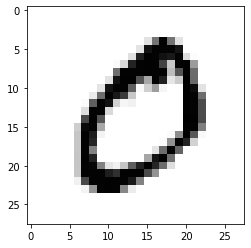

In [ ]:
all = a[1].split(',')
image = numpy.asfarray(all[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image, cmap='Greys', interpolation='None')

In [ ]:
si = (numpy.asfarray(all[1:])/255.0 * 0.09)+0.01
print(si)

In [ ]:
target = numpy.zeros(10) + 0.01
target[int(all[0])] = 0.99
print(target)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [ ]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

class Neuralnetwork:

  ### 신경망을 초기화하기
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    # 계층의 노드 개수 결정
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes

    # 가중치
    self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # 학습률
    self.lr = learningrate

    # 활성화 함수로 시그모이드 함수를 사용
    self.activation_function = lambda x: scipy.special.expit(x)


  ### 신경망 학습
  def train(self, inputs_list, targets_list):
    inputs = numpy.array(inputs_list, ndmin=2).T
    targets = numpy.array(targets_list, ndmin=2).T

    # 은닉계층 
    hidden_inputs = numpy.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # 출력 계층
    final_inputs = numpy.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    # 오차
    output_errors = targets - final_outputs
    # 가중치에 의해 나눈 오차들을 계산
    hidden_errors = numpy.dot(self.who.T, output_errors)

    # 가중치 업데이트
    # 은닉, 출력
    self.who += self.lr * numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
    # 입력, 은닉
    self.wih += self.lr * numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))


  ### 질의 
  def query(self, inputs_list):
    # 2차원의 행렬로 변환
    inputs = numpy.array(inputs_list, ndmin=2).T

    # 은닉계층 
    hidden_inputs = numpy.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # 출력 계층
    final_inputs = numpy.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

In [ ]:
n = Neuralnetwork(784, 100, 10, 0.3)

In [ ]:
a1= open('/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/mnist_train_100.csv', 'r')
train = a1.readlines()
a1.close()

In [ ]:
# 모든 레코드 탐색
for record in train:
  # 쉼표 분리
  all = record.split(',')

  # 일력값
  inputs = (numpy.asfarray(all[1:])/255.0 *0.99) +0.01
  
  # 결과값 생성
  targets = numpy.zeros(10) + 0.01
  targets[int(all[0])] = 0.99
  n.train(inputs, targets)


In [ ]:
a1= open('/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/mnist_test_10.csv', 'r')
test = a1.readlines()
a1.close()

In [ ]:
all = test[0].split(',')
print(all[0])

7


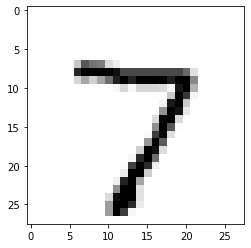

In [ ]:
image = numpy.asfarray(all[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image, cmap='Greys', interpolation='None')

In [ ]:
n.query((numpy.asfarray(all[1:])/255.0 *0.99) +0.01)

array([[0.03701021],
       [0.00915775],
       [0.01158898],
       [0.06695181],
       [0.06472105],
       [0.01567535],
       [0.00637951],
       [0.90897686],
       [0.02448681],
       [0.01218385]])

In [ ]:
# 신경망 테스트
# 어짜피 시작은 0부터라서 numpy.argmax랑 같은 인덱스가 나옴

score = []

for red in test:
  all = red.split(',')

  correct = int(all[0])
  print("이거는 정답", correct)

  inputs = (numpy.asfarray(all[1:])/255.0 *0.99) +0.01

  outputs = n.query(inputs)

  # 가장 높은 값의 인덱스
  label = numpy.argmax(outputs)
  print("신경망의 답", label)

  #계산
  if (label == correct):
    score.append(1)
  else:
    score.append(0)


이거는 정답 7
신경망의 답 7
이거는 정답 2
신경망의 답 2
이거는 정답 1
신경망의 답 1
이거는 정답 0
신경망의 답 0
이거는 정답 4
신경망의 답 4
이거는 정답 1
신경망의 답 1
이거는 정답 4
신경망의 답 4
이거는 정답 9
신경망의 답 4
이거는 정답 5
신경망의 답 1
이거는 정답 9
신경망의 답 7


In [ ]:
score

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

In [ ]:
score_arrary = numpy.asarray(score)
print("값: ", score_arrary.sum() / score_arrary.size)

값:  0.7


In [ ]:
# 반복 학습 'epoch'

epochs = 2

for e in range(epochs):
  # 모든 레코드 탐색
  for record in train:
    # 쉼표 분리
    all = record.split(',')

    # 입력값
    inputs = (numpy.asfarray(all[1:])/255.0 *0.99) +0.01
  
   # 결과값 생성
    targets = numpy.zeros(10) + 0.01
    targets[int(all[0])] = 0.99
    n.train(inputs, targets)


> 신경망 책 끝!!!!

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

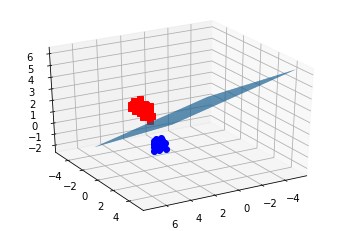

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first three features.
Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

In [ ]:
whole = temp.loc[:,['현재가','거래량','시가']]
whole

,현재가,거래량,시가
0,2650,1472052,2515
1,2500,328018,2640
2,2675,506930,2595
3,2625,267663,2615
4,2630,387148,2750
...,...,...,...
39195,32950,2108776,32400
39196,31750,739098,31250
39197,31050,554258,31300
39198,31300,828936,31350


In [ ]:
whole.columns

Index(['현재가', '거래량', '시가'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 정규화
transformer = MinMaxScaler()
transformer.fit(whole)
whole = transformer.transform(whole)
whole = pd.DataFrame(whole, columns = ['현재가', '거래량', '시가'])

In [ ]:
whole

,현재가,거래량,시가
0,0.001509,0.002988,0.001431
1,0.001418,0.000666,0.001507
2,0.001524,0.001029,0.001479
3,0.001494,0.000543,0.001491
4,0.001497,0.000786,0.001573
...,...,...,...
39195,0.019886,0.004280,0.019599
39196,0.019158,0.001500,0.018900
39197,0.018733,0.001125,0.018931
39198,0.018885,0.001682,0.018961


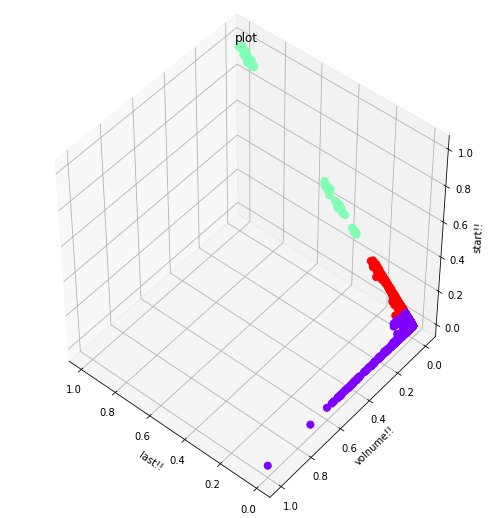

In [ ]:
kmeans(whole)

In [ ]:
from sklearn.cluster import KMeans

#클러스터의 개수 지정(n개)
num_clusters = 2

#알맞은 매트릭스 Z 삽입
km = KMeans(n_clusters=num_clusters)
km.fit(a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from scipy.spatial.distance import cdist
distortions = []

K = range(0,40)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(a)
    kmeanModel.fit(a)
    distortions.append(sum(np.min(cdist(a, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / a.shape[0])
  
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

OverflowError: ignored


https://dacon.io/competitions/official/235663/codeshare/2159?page=1&dtype=recent&ptype=pub


In [ ]:
Z = clus_data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Z)
    kmeanModel.fit(Z)
    distortions.append(sum(np.min(cdist(Z, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Z.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
model = KMeans(n_clusters=4,algorithm='auto')
model.fit(clus_data)

predict = pd.DataFrame(model.predict(clus_data))
center = model.cluster_centers_
labels = model.labels_
predict.columns=['predict']

# 결과 합치기
final_df = pd.DataFrame(np.hstack((predict, clus_data)))
# 컬럼명 지정
cols = list(clus_data.columns.values)
cols.insert(0,'group')
final_df.columns = cols

# 그룹이름 변경
group_name = {0: 'gr01',
               1: 'gr02',
               2: 'gr03',
              3: 'gr04'}

final_df['group'] = final_df['group'].replace(group_name)
new_cus['group'] = final_df['group']

In [ ]:
# 2개의 차원으로 축소
transformed = PCA(n_components=2).fit_transform(clus_data)

pca_df = pd.DataFrame(data=transformed, columns=['제1주성분','제2주성분']) 
plt.figure(figsize=(20,10))
plt.scatter('제1주성분','제2주성분',data=pca_df,c=labels,cmap='rainbow')
plt.xlabel('제1주성분')
plt.ylabel('제2주성분')
plt.show

In [ ]:
#군집 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
dim3 = PCA(n_components=3).fit_transform(clus_data)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=130)
ax.scatter(dim3[:,0], dim3[:,1], dim3[:,2], c=labels, alpha=0.5, cmap='rainbow')
ax.set_title('3차원 산점도 그래프')
ax.set_xlabel('제1 주성분')
ax.set_ylabel('제2 주성분')
ax.set_zlabel('제3 주성분')
plt.show()

In [ ]:
pca = PCA(n_components=4)
pca.fit_transform(clus_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
# 3차원 주성분으로 65% 설명 가능

In [ ]:
# 그룹 별 개수 시각화
sns.countplot(new_cus['group'], palette="Set2")
new_cus['group'].value_counts()